In [1]:
using Pkg
Pkg.add("Roots")
Pkg.add("ForwardDiff")
Pkg.add("DataFrames")
Pkg.add("Images")
Pkg.add("ImageMagick")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  67.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Ma

In [2]:
using Roots
using ForwardDiff
using Statistics
using Plots
using DataFrames
using Images
using ImageMagick

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1189


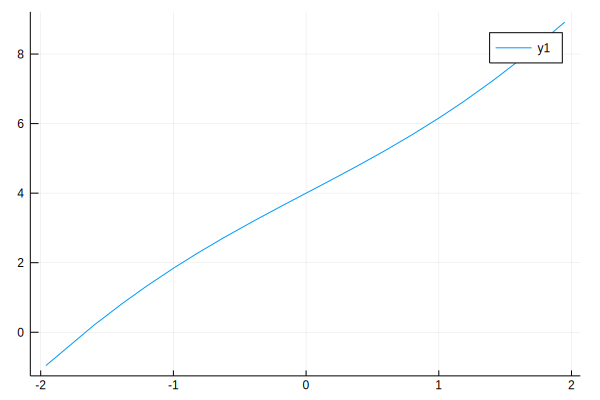

In [3]:
f(x) = 3x - sin(x) + 4
plot(f, -2, 2)

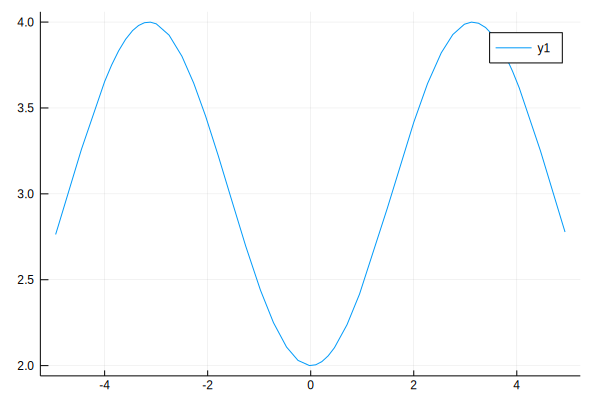

In [4]:
D(f) = x->ForwardDiff.derivative(f, float(x))
plot(D(f), -5, 5)

In [5]:
value_array = []
y_array = []
bool_array = []
sign_array = []
type_array = []
iter_array = []
func_evals = []

0-element Array{Any,1}

In [6]:
function zero_finder(f, from, to)
    push!(type_array, "Falsi")
    x = find_zero(f, (from, to), FalsePosition(), verbose = true)
    push!(value_array, x)
    push!(y_array, f(x))
    push!(bool_array, iszero(f(x)))
    push!(sign_array, sign(f(prevfloat(x))) *sign(f(nextfloat(x))))
    
    push!(type_array, "Newton")
    D(func) = x->ForwardDiff.derivative(f, float(x))
    x = find_zero((f, D(f)),0, Roots.Newton(),  verbose = true)
    push!(value_array, x)
    push!(y_array, f(x))
    push!(bool_array, iszero(f(x)))
    push!(sign_array, sign(f(prevfloat(x))) *sign(f(nextfloat(x))))
    
    push!(type_array, "Secant")
    x = find_zero(f,0, Order1(), verbose=true)
    push!(value_array, x)
    push!(y_array, f(x))
    push!(bool_array, iszero(f(x)))
    push!(sign_array, sign(f(prevfloat(x))) *sign(f(nextfloat(x))))
end

zero_finder (generic function with 1 method)

In [7]:
g(x) = ( x + 3 ) * ( x - 1 )^2
h(x) = 0.00001*( x - 100.0 )
i(x) = (x-1)^7
j(x) = 2 * x - exp( - x )
k(x) = 1.0 / ( ( x - 0.3 )^2 + 0.01 ) + 1.0 / ( ( x - 0.9 ) ^ 2 + 0.04 ) + 2.0 * x - 5.2
l(x) = x^3 - 2*x - 5

l (generic function with 1 method)

In [8]:
zero_finder(g, -100, 100)
zero_finder(h, 0, 200)
zero_finder(i, -100, 100)
zero_finder(j, -100, 100)
zero_finder(k, -100, 100)
zero_finder(l, -100, 100)

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 22
* function evaluations: 24
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-100.0000000000000000,  0.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000, -50.0000000000000000)
(a_2, b_2) = (-50.0000000000000000, -0.0004090046462935)
(a_3, b_3) = (-50.0000000000000000, -0.0016368249257277)
(a_4, b_4) = (-50.0000000000000000, -0.0040973681590691)
(a_5, b_5) = (-50.0000000000000000, -0.0090381152812809)
(a_6, b_6) = (-50.0000000000000000, -0.0189986522418247)
(a_7, b_7) = (-50.0000000000000000, -0.0392391043056178)
(a_8, b_8) = (-50.0000000000000000, -0.0810232703390948)
(a_9, b_9) = (-50.0000000000000000, -0.1700116436135417)
(a_10, b_10) = (-50.0000000000000000, -0.3713235533482274)
(a_11, b_11) = (-50.0000000000000000, -0.8798093233764965)
(a_12, b_12) = (-50.0000000000000000, -2.3742413845902961)
(a_13, b_13) = (-2.3742413


* Converged to: 0.9938233080518548
* Algorithm: Roots.Newton()
* iterations: 33
* function evaluations: 34
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.1428571428571428,	 fx_1 = -0.3399166770891139
x_2 =  0.2653061224489796,	 fx_2 = -0.1155433473633047
x_3 =  0.3702623906705539,	 fx_3 = -0.0392751106954878
x_4 =  0.4602249062890462,	 fx_4 = -0.0133502651199173
x_5 =  0.5373356339620396,	 fx_5 = -0.0045379777578210
x_6 =  0.6034305433960340,	 fx_6 = -0.0015425343201428
x_7 =  0.6600833229108862,	 fx_7 = -0.0005243331403989
x_8 =  0.7086428482093311,	 fx_8 = -0.0001782295787721
x_9 =  0.7502652984651409,	 fx_9 = -0.0000605832061752
x_10 =  0.7859416843986922,	 fx_10 = -0.0000205932421305
x_11 =  0.8165214437703076,	 fx_11 = -0.0000069999864355
x_12 =  0.8427326660888350,	 fx_12 = -0.0000023794121288
x_13 =  0.8651994280761443,	 fx_13 = -0.0000008088018643
x_14 =  0.8844566526366950,	 fx_14 =


* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 19
* function evaluations: 20
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -5.0000000000000000
x_1 = -2.5000000000000000,	 fx_1 = -15.6250000000000000
x_2 = -1.5671641791044775,	 fx_2 = -5.7146324514651070
x_3 = -0.5025924450866797,	 fx_3 = -4.1217695422221725
x_4 = -3.8207064676993294,	 fx_4 = -53.1324879623681738
x_5 = -2.5493933913606064,	 fx_5 = -16.4707576140240164
x_6 = -1.6081114997282251,	 fx_6 = -5.9423896750176617
x_7 = -0.5761004336602393,	 fx_7 = -4.0390020905449111
x_8 = -4.5977095833821693,	 fx_8 = -92.9952575692345391
x_9 = -3.0835431467266550,	 fx_9 = -28.1519768702820130
x_10 = -2.0221942554643366,	 fx_10 = -9.2249089970538503
x_11 = -1.1237641075795191,	 fx_11 = -4.1716125339957122
x_12 =  1.2086516123957836,	 fx_12 = -5.6516581502357903
x_13 =  3.5807900448965704,	 fx_13 =  33.7515152085330783
x_14 =  2.6552331980087693,	 f

18-element Array{Any,1}:
 -1.0
  1.0
  1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

In [9]:
iter_array = [22, 26, 37, 1, 1, 2, 41, 33, 41, 7, 4, 5, 10, 7, 10, 23, 19, 12]
func_evals = [24, 27, 39, 3, 2, 4, 43, 34, 43, 9, 5, 7, 12, 8, 12, 25, 20, 14]

18-element Array{Int64,1}:
 24
 27
 39
  3
  2
  4
 43
 34
 43
  9
  5
  7
 12
  8
 12
 25
 20
 14

In [10]:
df = DataFrame()
df[:value] = value_array
df[:y]     = y_array
df[:bool]  = bool_array
df[:sign]  = sign_array
df[:iters] = iter_array
df[:func_evals] = func_evals
df[:type]  = type_array
show(df, allrows=true)

18×7 DataFrame
│ Row │ value    │ y            │ bool  │ sign │ iters │ func_evals │ type   │
│     │ Any      │ Any          │ Any   │ Any  │ Int64 │ Int64      │ Any    │
├─────┼──────────┼──────────────┼───────┼──────┼───────┼────────────┼────────┤
│ 1   │ -3.0     │ 0.0          │ true  │ -1.0 │ 22    │ 24         │ Falsi  │
│ 2   │ 1.0      │ 4.56496e-16  │ false │ 1.0  │ 26    │ 27         │ Newton │
│ 3   │ 1.0      │ 5.18739e-16  │ false │ 1.0  │ 37    │ 39         │ Secant │
│ 4   │ 100.0    │ 0.0          │ true  │ -1.0 │ 1     │ 3          │ Falsi  │
│ 5   │ 100.0    │ 0.0          │ true  │ -1.0 │ 1     │ 2          │ Newton │
│ 6   │ 100.0    │ 0.0          │ true  │ -1.0 │ 2     │ 4          │ Secant │
│ 7   │ 0.981413 │ -7.66322e-13 │ false │ 1.0  │ 41    │ 43         │ Falsi  │
│ 8   │ 0.993823 │ -3.42998e-16 │ false │ 1.0  │ 33    │ 34         │ Newton │
│ 9   │ 0.98792  │ -3.7531e-14  │ false │ 1.0  │ 41    │ 43         │ Secant │
│ 10  │ 0.351734 │ 0.0          │ tru

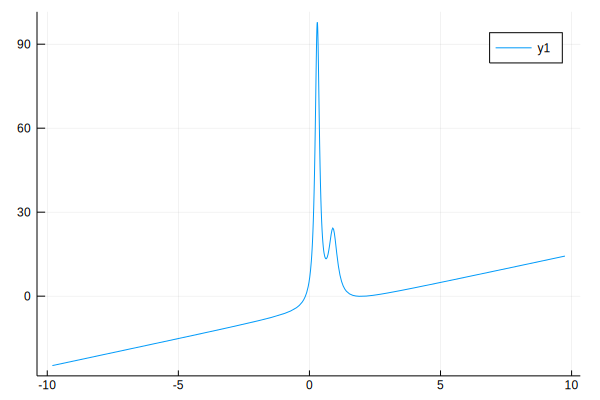

In [11]:
plot(k, -10,10)

In [12]:
x = find_zero(k, (-5,5), FalsePosition(), verbose=true)
D(k) = x->ForwardDiff.derivative(k, float(x))
y = find_zero((k, D(k)),0, Roots.Newton(), verbose=true)
z = find_zero(k, 0, Order1(), verbose=true)

x, k(x), iszero(k(x)),  sign(k(prevfloat(x))) *sign(k(nextfloat(x))),
y, k(y), iszero(k(y)),  sign(k(prevfloat(y))) *sign(k(nextfloat(y))), 
z, k(z), iszero(k(z)),  sign(k(prevfloat(z))) *sign(k(nextfloat(z)))

Results of univariate zero finding:

* Converged to: -0.1534804948126991
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 14
* function evaluations: 16
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: x_n ≈ x_{n-1}. Change of sign at xn identified. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = (-5.0000000000000000,  0.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000, -2.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000, -0.2275539722237214)
(a_3, b_3) = (-0.2275539722237214, -0.0855157278828493)
(a_4, b_4) = (-0.0855157278828493, -0.1671048831741153)
(a_5, b_5) = (-0.0855157278828493, -0.1559803279794783)
(a_6, b_6) = (-0.1559803279794783, -0.1534799704496735)
(a_7, b_7) = (-0.1534799704496735, -0.1534804983708595)
(a_8, b_8) = (-0.1534799704496735, -0.1534804948127042)
(a_9, b_9) = (-0.1534799704496735, -0.1534804948126992)
(a_10, b_10) = (-0.1534804948126992, -0.1534802326311864)
(a_11, b_

(-0.1534804948126991, 8.881784197001252e-16, false, -1.0, -0.1534804948126991, 8.881784197001252e-16, false, -1.0, -0.15348049481269913, -8.881784197001252e-16, false, -1.0)

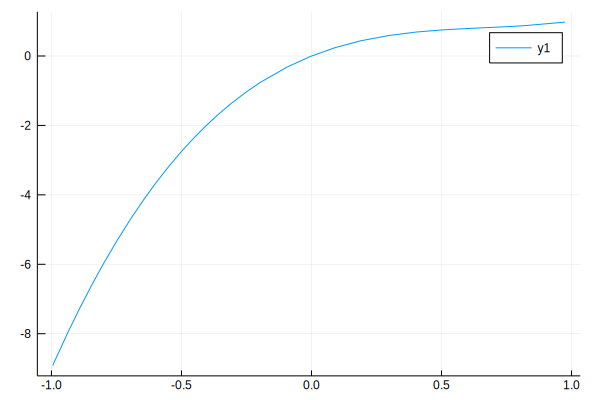

In [13]:
my_func(x) = 2x^3-4x^2+3x
plot(my_func, -1, 1)

In [14]:
x = find_zero(my_func, (-1,1), FalsePosition(), verbose=true)
x, my_func(x), iszero(x), sign(my_func(prevfloat(x))) *sign(my_func(nextfloat(x)))

Results of univariate zero finding:

* Converged to: 4.547473508864641e-13
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 41
* function evaluations: 43
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  0.5000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  0.2500000000000000)
(a_3, b_3) = ( 0.0000000000000000,  0.1250000000000000)
(a_4, b_4) = ( 0.0000000000000000,  0.0625000000000000)
(a_5, b_5) = ( 0.0000000000000000,  0.0312500000000000)
(a_6, b_6) = ( 0.0000000000000000,  0.0156250000000000)
(a_7, b_7) = ( 0.0000000000000000,  0.0078125000000000)
(a_8, b_8) = ( 0.0000000000000000,  0.0039062500000000)
(a_9, b_9) = ( 0.0000000000000000,  0.0019531250000000)
(a_10, b_10) = ( 0.0000000000000000,  0.0009765625000000)
(a_11, b_11) = ( 0.0000000000000000,  0.0004882812500000)
(a_12, b_12) = ( 0.000000000000

(4.547473508864641e-13, 1.3642420526585652e-12, false, 1.0)

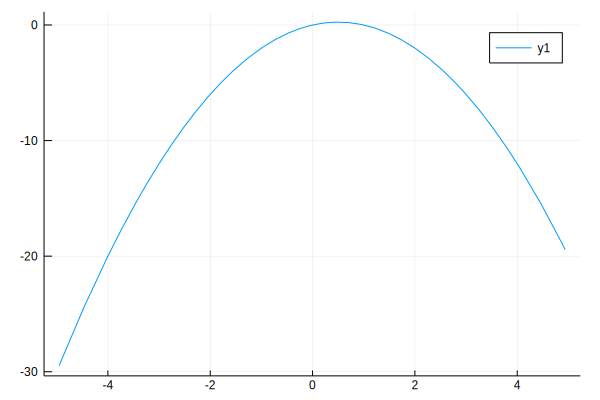

In [15]:
my_newt(x) = x*(1-x)
plot(my_newt, -5 ,5)

In [16]:
D(my_newt) = x->ForwardDiff.derivative(my_newt, float(x))
y = find_zero((my_newt, D(my_newt)),0.5, Roots.Newton(), verbose=true)
#  a′=a−f(a)/f′(a) : x0 = 0.5 - 0.25/~0  ~ inf

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.5000000000000000,	 fx_0 =  0.2500000000000000
x_1 =  0.5000000000000000,	 fx_1 =  0.2500000000000000



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.5")

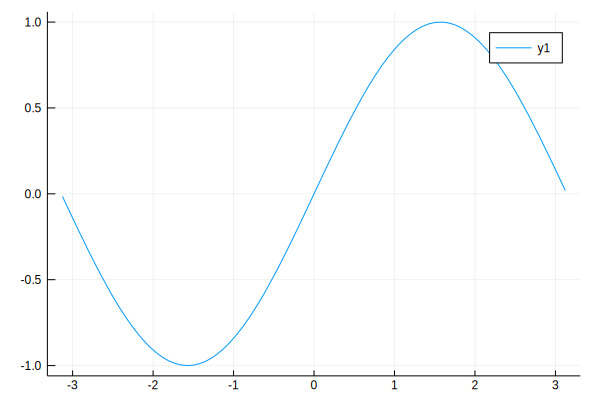

In [17]:
my_secant(x) = sin(x)
plot(my_secant, -pi, pi)
#analogicznie jak wyżej

In [18]:
z = find_zero(my_secant, pi/2, Order1(), verbose=true)

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Secant()

Trace:
x_0 =  1.5707963267948966,	 fx_0 =  1.0000000000000000
x_1 =  330278.1998836687416770,	 fx_1 =  0.5458312634194595
x_2 =  727212.8526076014386490,	 fx_2 = -0.1264081989398199
x_3 =  652573.0890157123794779,	 fx_3 =  0.9941968951896853
x_4 =  718793.2245563173200935,	 fx_4 =  0.0329863887603322
x_5 =  721065.7373098644893616,	 fx_5 =  0.8949292538943953
x_6 =  718706.2559274400118738,	 fx_6 = -0.8208930486288787
x_7 =  719835.0918578001437709,	 fx_7 =  0.9224783772773454
x_8 =  719237.7855570445535704,	 fx_8 =  0.9999729732176104
x_9 =  726945.2927740457234904,	 fx_9 = -0.3873087488100369
x_10 =  724793.4695868289563805,	 fx_10 =  0.2279095792265121
x_11 =  725590.6193055858602747,	 fx_11 =  0.8647967626249322
x_12 =  724508.2101849785540253,	 fx_12 =  0.3853613708174532
x_13 =  723638.1895948632154614,	 fx_13 = -0.5614808929205742
x_14 =  724154.1149569912813604,	 fx_14 

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 3.5848224615008813e8")

In [19]:
function other_newtons_fractal(x_max, y_max)
    f(z) = z^8+15*z^4-16
    der(z) = 8*z^7+60*z^3
    roots = [complex(1,0), complex(-1,0), complex(0,1), complex(0,-1), 
        2*(-1 +0im)^(1/4), -2*(-1 +0im)^(1/4), 2*(-1 +0im)^(3/4), -2*(-1 +0im)^(3/4)]
    colours = ["1","2","3","4", "5", "6", "7", "8", "0"]
    function choose_color(x,y, maxx, maxy)
        zx = x*3.5/maxx
        zy = y*2/maxy
        new_z =complex(zx, zy)
        iteration =1
        tolerance = 0.001
        while(iteration < 10)
            new_z -= f(new_z) / der(new_z)
            for i=1:8
                diff = new_z - roots[i]
                if(abs(real(diff))< tolerance && abs(imag(diff) < tolerance))
                    print(colours[i])
                    return
                end
            end
            iteration +=1
        end
        print(colours[9])
    end
    for y=0:y_max
        for x=0:x_max
            choose_color(x,y, x_max, y_max)
        end
        println()
    end
end

other_newtons_fractal (generic function with 1 method)

In [20]:
other_newtons_fractal(50, 50)

000000011111111111111111111111111111111111111111111
000000011111111111111111111111111111111111111111111
000000001111111111111111111111111111111111111111111
000000550111111111111111111111111111111111111111111
000000550111111111111111111111111111111111111111110
000000000511111111111111111115111111111111111111110
000000300111111111111111111111111151111111111111110
000060330011111111111111111111111111111111111111110
000066330001111111111111111111111111111111111111100
000000330101111111111111111111111111111111111111100
007020036001111111111111111111111111111111111111100
007022000051111111111111111111111111111111111111100
307022000001111111111111111111111111111111111111100
330322000000011111111111111111111111111111111110010
330030600005001111111111111111111111111111111100010
333000000005000011111111111111111111111111111000000
333005000000300001111111111111111111111111110000001
333300000003330351000011111111111111111111010000000
333330500060332000500500000101111111111100010000000
333333000001

In [21]:
function gray_newton(x_max, y_max)
    array = zeros(x_max,y_max)
    f(z) = z^8+15*z^4-16
    der(z) = 8*z^7+60*z^3
    roots = [complex(1,0), complex(-1,0), complex(0,1), complex(0,-1), 
        2*(-1 +0im)^(1/4), -2*(-1 +0im)^(1/4), 2*(-1 +0im)^(3/4), -2*(-1 +0im)^(3/4)]
    colours = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.0]
    function choose_color(x,y, maxx, maxy)
        zx = x*3.5/maxx
        zy = y*2/maxy
        new_z =complex(zx, zy)
        iteration =1
        tolerance = 0.001
        while(iteration < 15)
            new_z -= f(new_z) / der(new_z)
            for i=1:8
                diff = new_z - roots[i]
                if(abs(real(diff))< tolerance && abs(imag(diff) < tolerance))
                    return colours[i]
                end
            end
            iteration +=1
        end
        return colours[9]
    end
    for y=1:y_max
        for x=1:x_max
            array[y, x] =  choose_color(x,y, x_max, y_max)
        end
    end
    return array
end

gray_newton (generic function with 1 method)

In [32]:
function coloured_newton(x_max, y_max, max_iter)
    array = zeros(RGB{N0f8}, y_max, x_max)
    f(z) = z^8+15*z^4-16
    der(z) = 8*z^7+60*z^3
    roots = [complex(1,0), complex(-1,0), complex(0,1), complex(0,-1), 
        2*(-1 +0im)^(1/4), -2*(-1 +0im)^(1/4), 2*(-1 +0im)^(3/4), -2*(-1 +0im)^(3/4)]
    colours = [RGB(1,0,0), RGB(0,1,0), RGB(0,0,1), RGB(0.4,0.5,0.9), 
        RGB(0.4,0,0.6), RGB(0.5,0.1,0.2), RGB(0.1,0.1,0.1), RGB(0,0.5,0)
    ,RGB(0.1,0.4,0.6), RGB(0.6,0.1,0), RGB(0,0.5,0.3), RGB(0,0.4,0.2), RGB(0.0, 0.0, 0.0)]
    function choose_color(x,y, maxx, maxy)
        zx = (x*3.5/maxx) -2.5
        zy = (y*2/maxy) - 1.0
        new_z =complex(zx, zy)
        iteration =1
        tolerance = 0.001
        while(iteration < max_iter)
            new_z -= f(new_z) / der(new_z)
            for i=1:8
                diff = new_z - roots[i]
                if(new_z==roots[i])
                    return colours[i]*((max_iter - iteration)/max_iter)
                end
            end
            iteration +=1
        end
        return colours[13]
    end
    for y=1:y_max
        for x=1:x_max
           array[y,x] = choose_color(x,y, x_max, y_max)
        end
    end
    return array
end

coloured_newton (generic function with 4 methods)

In [35]:
for i=50:50
    x = coloured_newton(800, 600, i)
    save(string(i)*".png", x)
end

In [509]:
function iter_newton(x_max, y_max, x_scal, y_scal, max_iter, scale)
    array = zeros(RGB{N0f8}, y_max, x_max)
    f(z) = z^8+15*z^4-16
    der(z) = 8*z^7+60*z^3
    roots = [complex(1,0), complex(-1,0), complex(0,1), complex(0,-1), 
        2*(-1 +0im)^(1/4), -2*(-1 +0im)^(1/4), 2*(-1 +0im)^(3/4), -2*(-1 +0im)^(3/4)]
    colours = [RGB(1,0,0), RGB(0,1,0), RGB(0,0,1), RGB(0,0,0), 
        RGB(0.4,0,0.6), RGB(0.5,0.1,0.2), RGB(0.1,0.1,0.1), RGB(0,0.5,0), 
    RGB(1,0,0), RGB(0,1,0), RGB(0,0,1), RGB(0,0,0), 
        RGB(0.4,0,0.6), RGB(0.5,0.1,0.2), RGB(0.1,0.1,0.1), RGB(0,0.5,0), 
    RGB(1,0,0), RGB(0,1,0), RGB(0,0,1), RGB(0,0,0), 
        RGB(0.4,0,0.6), RGB(0.5,0.1,0.2), RGB(0.1,0.1,0.1), RGB(0,0.5,0), RGB(0,0,0)]
    function choose_color(x,y, maxx, maxy, scala)
        zx = x*3.5*scala/maxx -x_scal
        zy = y*2*scala/maxy -y_scal
        new_z =complex(zx, zy)
        iteration =1
        tolerance = 0.001
        while(iteration < max_iter)
            new_z -= f(new_z) / der(new_z)
            for i=1:8
                diff = new_z - roots[i]
                if(abs(real(diff))< tolerance && abs(imag(diff) < tolerance))
                    return colours[iteration%24 + 1]*((max_iter-iteration)*((rand(1)[1]*10000)%1)/max_iter)
                end
            end
            iteration +=1
        end
        return colours[25]
    end
    for y=1:y_max
        for x=1:x_max
           array[y,x] = choose_color(x,y, x_max, y_max, scale)
        end
    end
    return array
end

iter_newton (generic function with 4 methods)

In [505]:
trunc(Int,(rand(1)[1]*1000) % 24)+1

20

In [510]:
a = 1
for i=5.0:-0.5:1.0
    x= iter_newton(1000,1000, -2.5,-1, 60, i)
    save(string(a)*".png", x)
    a +=1
end
for i=1.0:-0.1:0.4
    x= iter_newton(1000,1000, -2.5,-1, 60, i)
    save(string(a)*".png", x)
    a +=1
end
for i=0.4:-0.05:0.1
    x= iter_newton(1000,1000, -2.5,-1, 60, i)
    save(string(a)*".png", x)
    a +=1
end
for i=0.1:-0.01:0.05
    x= iter_newton(1000,1000, -2.5,-1, 60, i)
    save(string(a)*".png", x)
    a +=1
end

InterruptException: InterruptException:

In [151]:
for i=0.1:-0.01:0.05
    x= iter_newton(1000,1000, -2.5,-1, 60, i)
    save(string(a)*".png", x)
    a +=1
end

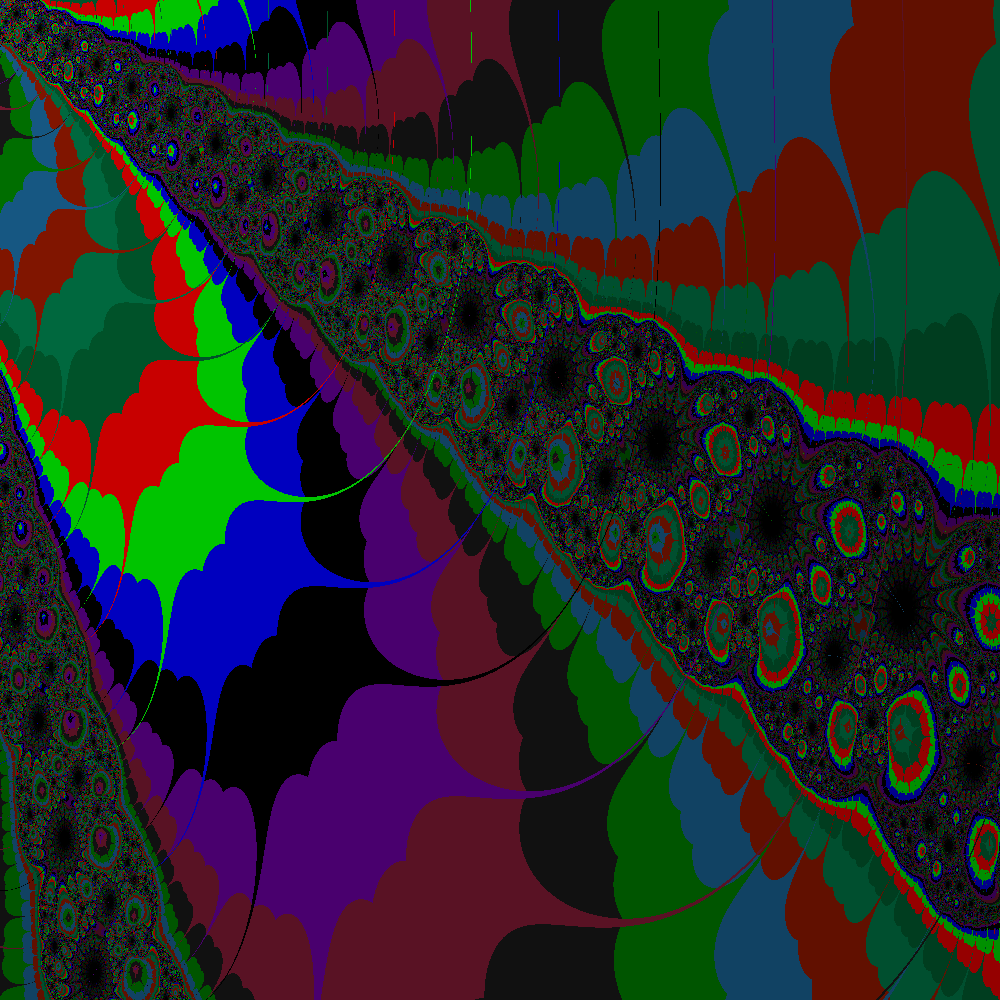

In [149]:
x= iter_newton(1000,1000, -2.5,-1,60,5)

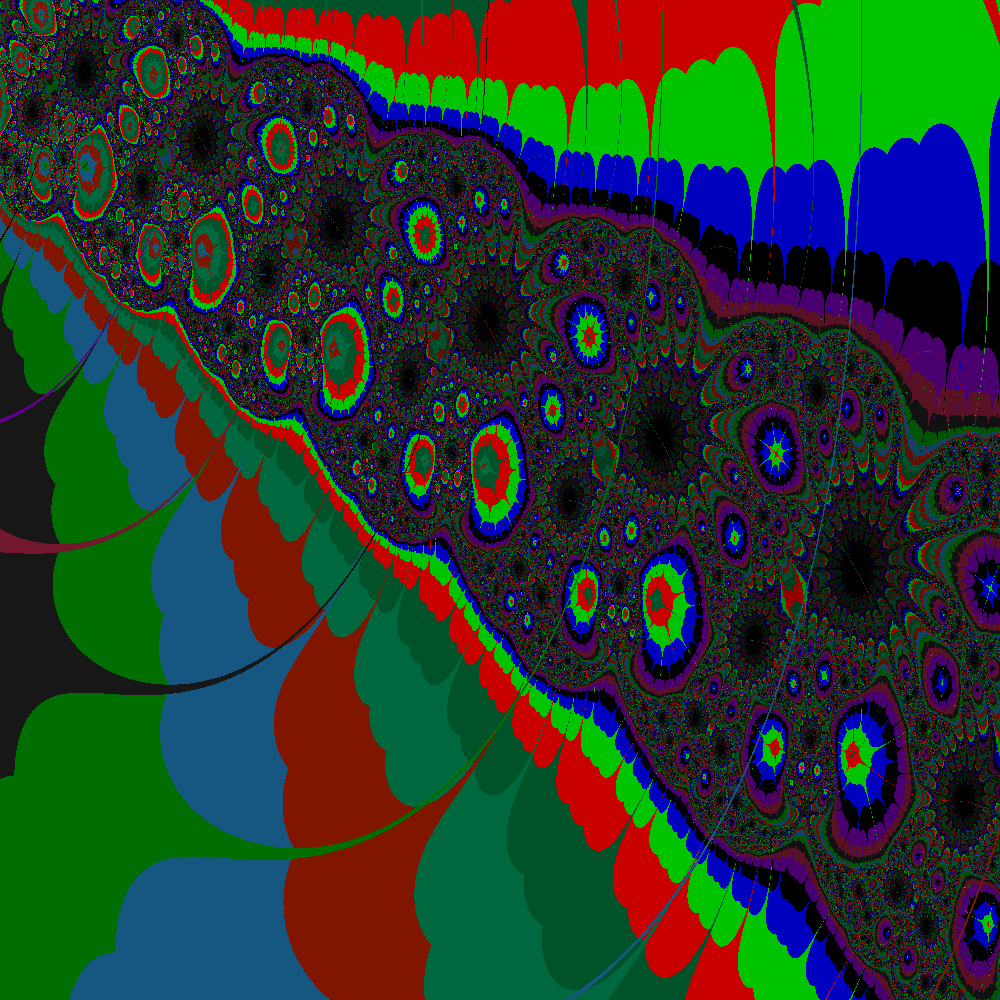

In [138]:
x= iter_newton(1000,1000, -2.5,-1,60,1)

In [26]:
function coloured_newton(x_max, y_max,lb, rb, tb, bb,maxiter = 100)
    array = zeros(RGB{N0f8}, y_max, x_max)
    
    f(z) = z^8+15*z^4-16
    der(z) = 8*z^7+60*z^3
    roots = [complex(1,0), complex(-1,0), complex(0,1), complex(0,-1), 2*(-1 +0im)^(1/4), -2*(-1 +0im)^(1/4), 2*(-1 +0im)^(3/4), -2*(-1 +0im)^(3/4)]
    colours = [RGB(1,0,0), RGB(0,1,0), RGB(0,0,1), RGB(0,0,0), RGB(0.4,0,0.6), RGB(0.5,0.1,0.2), RGB(0.1,0.1,0.1), RGB(0,0.5,0),RGB(0.1,0.4,0.6), RGB(0.6,0.1,0), RGB(0,0.5,0.3), RGB(0,0.4,0.2)]
    
    function choose_color(x, y)
        zx = x*abs(rb-lb)/x_max + lb
        zy = y*abs(tb-bb)/y_max + tb
        zk = complex(zx, zy)
        for iter=1:maxiter
            zk -= f(zk)/der(zk)
            for i=1:length(roots)
                if(zk == roots[i])
                    return colours[i]
                end
            end
        end
        return colours[length(roots)+1]
    end
    
    for y=1:y_max
        for x=1:x_max
           array[y,x] = choose_color(x,y)
        end
    end
    return array
end

coloured_newton (generic function with 3 methods)

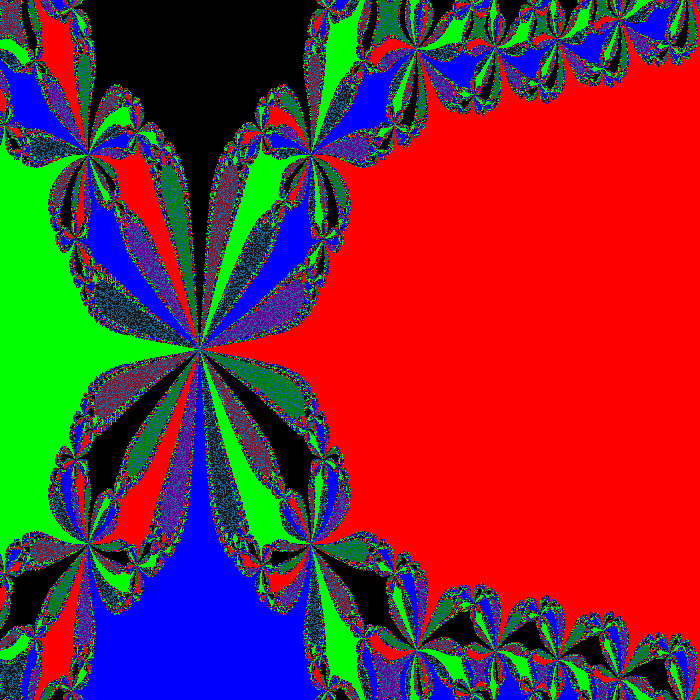

In [27]:
coloured_newton(700,700, -1, 2.5, -1, 1)